# Week 7: Spreadsheets, Introduction to Pandas, Working with the NYT Best Seller list

Before we talk about Pandas, I promised to talk more about spreadsheets and csv files. Spreadsheet programs like MS Excel and Google sheets expect the files they open to have a specific format.  The simplest of these format is know as "comma separated values" or csv. 

Here are the first four lines of ttr-standardized.csv from our last lecture:

```
Text,Types,Tokens,TTR
1897-McKinley,290,560,51.79
1901-McKinley,303,560,54.11
1905-Roosevelt,250,560,44.64
```

Each line of the file is a row in the spreadsheet and the columns are separated by commas. One of the nice things about JupyterLab over JupyterHub is that JupyterLab will display csv files in a nice tabular format. In class, I'll show you what the file looks liek in Google Sheets.

Let's try reading a csv file using Python and printing only the first column and the last column. The comments in the code explain each step. The only new parts that we haven't talked about are using `.strip()` to remove newline characters and any whitespace from the ends of lines and using `.readline()` or `.readlines()` to read a file line by line instead of reading it all at once with `.read()`

Since reading and working with csv files is so common, Pandas has all of this built into a single `.read_csv()` function.

In [ ]:
ttr_file = open("ttr-standardized.csv", encoding="utf-8")

# We are going to read this file a little differently, because we want to process one line at a time.

# We want to ignore the headings line, so we will just read it and not save it.
ttr_file.readline()

# for each row of the spreadsheet (aka line of the file)
for line in ttr_file.readlines():
    # get rid of the newline character at the end of the line
    line = line.strip()
    # create a list of values in the row
    columns = line.split(",")
    # print the first and last column value
    print(f"{columns[0]} has a TTR of {columns[-1]}")


1897-McKinley has a TTR of 51.79
1901-McKinley has a TTR of 54.11
1905-Roosevelt has a TTR of 44.64
1909-Taft has a TTR of 47.32
1913-Wilson has a TTR of 47.14
1917-Wilson has a TTR of 46.43
1921-Harding has a TTR of 51.43
1925-Coolidge has a TTR of 53.04
1929-Hoover has a TTR of 46.43
1933-Roosevelt has a TTR of 53.93
1937-Roosevelt has a TTR of 48.04
1941-Roosevelt has a TTR of 44.64
1945-Roosevelt has a TTR of 46.61
1949-Truman has a TTR of 45.54
1953-Eisenhower has a TTR of 48.04
1957-Eisenhower has a TTR of 48.57
1961-Kennedy has a TTR of 50.89
1965-Johnson has a TTR of 45.18
1969-Nixon has a TTR of 48.21
1973-Nixon has a TTR of 41.79
1977-Carter has a TTR of 50.89
1981-Reagan has a TTR of 51.25
1985-Reagan has a TTR of 51.43
1989-Bush has a TTR of 45
1993-Clinton has a TTR of 50.54
1997-Clinton has a TTR of 48.04
2001-Bush has a TTR of 48.04
2005-Bush has a TTR of 48.04
2009-Obama has a TTR of 51.96
2013-Obama has a TTR of 52.14
2017-Trump has a TTR of 45.18
2021-Biden has a TTR 


Now let's take a look at some of the basics of Pandas, a powerful Python library for working with tabular data like CSV files. And we start working with a new dataset — which does not contain any actual "text"; just metadata. What can we learn from it??

We will cover how to:

* Import Pandas
* Read in a CSV or TSV file with Pandas
* Explore and filter data
* Make simple plots and data visualizations

Statistical concepts:
* Mode, median, quartiles (from .describe() output)

Today's lecture follows Melanie Walsh's chapter [Pandas Basics — Part 1](https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/01-Pandas-Basics-Part1.html)


## Dataset

The New York Times Hardcover Best Sellers dataset comes from the Post45 Data Collective: https://data.post45.org/our-data/

# What Is (Are?) Pandas 🐼🐼

**Pandas** is a powerful Python library for working with tabular data (aka spreadsheet-like stuff). If (nay, **when**) you find yourself working as a Data Scientist, you will use a whole lot of Pandas to make your life easier. Think of it as a way of performing all kinds of complicated tasks without having to code everything out in massive coding blocks.

Still, Pandas will feel a bit like a whole new language. Our knowledge of Python to this point takes us a long way toward understanding it. But it will still take some getting-used-to.

# Importing Pandas

Like any Python library (such as `re`, our regular expressions library), we need to call Pandas down the firepole in order to use it!

We are going to use a slightly different syntax to import the Pandas library.  What this syntax does is allow us to give a "nickname" for pandas, so that we don't have to type the full library name every time we want to use a method from it.

In [4]:
import pandas as pd

Let's just go right ahead and load the *New York Times* Best Seller Listwhich your ENG286 Instuctors Team has placed in the same folder in which this lecture lives. It's called `nyt_dataset.tsv`

This dataset comes to us as a "TSV" (tab-separated values) — which is exactly like a CSV (comma-separated values), except that the values are separated by... tabs (the `\t` character)... rather than commas (`,`s).

The below line of code invokes the `pd.read_csv()` method, which is a built-in bit of code that Pandas provides us to quickly load CSV or TSV files. We tell the method that this is a **T**SV with the `sep="\t"` parameter.  If we wanted to open up a CSV file, we would leave out the `sep="\t"` argument.

It loads the file and stores it in a variable we've named `nyt_df`.

In [6]:
nyt_df = pd.read_csv('nyt_full.tsv', sep="\t")

Pandas creates a new **data type** for us: a special data type all its own called a **DataFrame**, which you can think of as a spreadsheet, with some advanced capabilities we'll be exploring throughout the rest of the semester...

In [7]:
type(nyt_df)

pandas.core.frame.DataFrame

Let's have a look at what's inside...

In [8]:
nyt_df

,year,week,rank,title_id,title,author
0,1931,1931-10-12,1,6477,THE TEN COMMANDMENTS,Warwick Deeping
1,1931,1931-10-12,2,1808,FINCHE'S FORTUNE,Mazo de la Roche
2,1931,1931-10-12,3,5304,THE GOOD EARTH,Pearl S. Buck
3,1931,1931-10-12,4,4038,SHADOWS ON THE ROCK,Willa Cather
4,1931,1931-10-12,5,3946,SCARMOUCHE THE KING MAKER,Rafael Sabatini
...,...,...,...,...,...,...
60381,2020,2020-12-06,11,2332,I WOULD LEAVE ME IF I COULD,Halsey
60382,2020,2020-12-06,12,6601,THE VANISHING HALF,Brit Bennett
60383,2020,2020-12-06,13,7239,WHERE THE CRAWDADS SING,Delia Owens
60384,2020,2020-12-06,14,482,ANXIOUS PEOPLE,Fredrik Backman


There are a few things to note about this output:

- **Index**
    - The bolded ascending numbers in the very left-hand column of the DataFrame is called the Pandas Index. You can select rows based on the Index.
    - By default, the Index is a sequence of numbers starting with zero. However, you can change the Index to something else, such as one of the columns in your dataset.

- **Truncation**
    - The DataFrame is truncated, signaled by the ellipses (`...`) in the middle of every column. To display all the rows, we would need to tweak Pandas's settings. For now, this is fine.
    
- **Rows x Columns**
    - Pandas reports how many rows and columns are in this dataset at the bottom of the output (60386 rows × 6 columns). 
    - **Let's have a look at all these columns and dimensions and try to wrap our heads around what's actually in this DataFrame!**

# Display the First `x` Rows

If you just want to look at the first `x` number of rows, you can use the `.head()` method, as below.

In [9]:
nyt_df.head(10)

,year,week,rank,title_id,title,author
0,1931,1931-10-12,1,6477,THE TEN COMMANDMENTS,Warwick Deeping
1,1931,1931-10-12,2,1808,FINCHE'S FORTUNE,Mazo de la Roche
2,1931,1931-10-12,3,5304,THE GOOD EARTH,Pearl S. Buck
3,1931,1931-10-12,4,4038,SHADOWS ON THE ROCK,Willa Cather
4,1931,1931-10-12,5,3946,SCARMOUCHE THE KING MAKER,Rafael Sabatini
5,1931,1931-11-16,1,2878,MAID IN WAITING,John Galsworthy
6,1931,1931-11-16,2,7031,TWO PEOPLE,A. A. Milne
7,1931,1931-11-16,3,413,AMERICAN BEAUTY,Edna Ferber
8,1931,1931-11-16,4,859,BROOME STAGES,Clemence Dane
9,1931,1931-11-16,5,4235,SPARKS FLY UPWARD,Oliver LaFarge


# Display a Random Sample

If you want to look at a random sample of `x` rows, you can use the `.sample()` method.

In [11]:
nyt_df.sample(10)

,year,week,rank,title_id,title,author
44562,2001,2001-01-28,5,5148,THE FIRST COUNSEL,Brad Meltzer
35033,1989,1989-01-22,15,1359,DEAR MILI,Wilhelm Grimm
8247,1950,1950-07-09,9,4843,THE CIRCLE OF THE DAY,Helen Huntington Howe
33671,1987,1987-05-10,12,2065,GUARDIANS OF THE WEST,David Eddings
35793,1990,1990-01-07,14,5515,THE JOY LUCK CLUB,Amy Tan
30483,1983,1983-05-01,7,4962,THE DELTA STAR,Joseph Wambaugh
52387,2010,2010-12-05,1,1199,CROSS FIRE,James Patterson
7529,1949,1949-08-28,11,3319,"O SHEPHERD, SPEAK!",Upton Sinclair
39561,1994,1994-10-16,5,4669,THE BODY FARM,Patricia Cornwell
39447,1994,1994-08-21,12,7078,UNTIL YOU,Judith McNaught


# Get Info

If you'd like to see basic information about what's in your DataFrame, you can use the `.info()` method.

In [12]:
nyt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60386 entries, 0 to 60385
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      60386 non-null  int64 
 1   week      60386 non-null  object
 2   rank      60386 non-null  int64 
 3   title_id  60386 non-null  int64 
 4   title     60386 non-null  object
 5   author    60386 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.8+ MB


This tells you how many "non-null" (or non-empty) entries are in each column, as well as the kind of data in each column.

Our friend Pandas has their own name for familiar Python data types. Pandas speak their own language, after all; so if we want their cuddles, we must learn this language.

- **object**: string
- **int64**: integer
- **float64**: float
- **datetime64**: date time (a data type we haven't encountered yet)

# Calculate Summary Statistics

We can use the `.describe()` method on a Pandas DataFrame to see summary statistics about the contents of each column. By default, `.describe()` only shows you summaries for three columns, but we're going to ask Pandas to give us summary statistics for all the columns, which we'll do with the `include="all"` parameter.

In [13]:
nyt_df.describe(include="all")

,year,week,rank,title_id,title,author
count,60386.000000,60386,60386.000000,60386.000000,60386,60386
unique,NaN,4621,NaN,NaN,7144,2068
top,NaN,1987-08-16,NaN,NaN,"OH, THE PLACES YOU'LL GO!",Danielle Steel
freq,NaN,18,NaN,NaN,178,957
mean,1980.291375,NaN,7.578329,3810.223760,NaN,NaN
std,24.440366,NaN,4.401472,2118.746023,NaN,NaN
min,1931.000000,NaN,1.000000,0.000000,NaN,NaN
25%,1958.000000,NaN,4.000000,2012.000000,NaN,NaN
50%,1982.000000,NaN,7.000000,3932.000000,NaN,NaN
75%,2001.000000,NaN,11.000000,5599.000000,NaN,NaN


Anywhere that Pandas can't calculate the kind of thing we're asking for, we'll see `NaN`, which is Pandas's way of saying "data is missing."

We're all very well equipped to understand the summary stats for the columns containig strings (aka `object`s).
- **unique**: number of different strings present. **What does that mean here??**
- **top**: most commonly occurring string. **What does that mean here??**
- **freq**: the number of times that the top unique string occurs. **What does that mean here??**

## Digression: How we can describe and summarise (numeric) data statistically? (in 10 min)

- Central tendency measures (and scales/levels of measurement): mean, median, mode
- Spread measures (standard deviation, percentiles & percentile ranges) <- not today, but important
- Key abstractions of stats: probability distribution and data generation process <- if have time


Let's look at an example. Suppose we have salaries for a two different job categories: A and B. Can we find out something about the salaries?  To do that we will talk about mean, median, and mode.

* Mean - arithmetic mean -- aka average
    * Add up all the numbers and divide by the number of elements
* Median - sort the data, choose the value in the center
* Mode - which value is the most frequent


In [42]:
# a library that gives us some useful stats functions
import statistics

salaries_A = [75, 78, 75, 80, 75, 80, 75, 85, 75, 70]
salaries_B = [55, 60, 55, 45, 50, 55, 100, 85, 45, 55]

# First let's combine the two lists and look into all the salaries
all_salaries = salaries_A + salaries_B

print(sorted(all_salaries))

print(f"Mean salary is {statistics.mean(all_salaries)}")
print(f"Median salary is {statistics.median(all_salaries)}")
print(f"The mode is {statistics.mode(all_salaries)}")


[45, 45, 50, 55, 55, 55, 55, 60, 70, 75, 75, 75, 75, 75, 78, 80, 80, 85, 85, 100]
Mean salary is 68.65
Median salary is 75.0
The mode is 75


* We get the *mean* salary by adding up all the salaries and dividing by the number of elements.
* The *median* is the middle value, but there are 20 elements in this list, so we don't have a middle value.  Instead we take the values at index 9 and index 10, and get their average.  In `all_salaries`, these values are 70 and 75, so the median is halfway between these two numbers at 72.5.
* For *mode* we count the number of times each value appears.  75 appears five times, so it is the mode.

What information do we get when the median is higher than the mean?

Now let's look at each salary category separately.  Which one do you thing will have a higher mean?

In [43]:
print("Category A:")
print(f"Mean salary is {statistics.mean(salaries_A)}")
print(f"Median salary is {statistics.median(salaries_A)}")
print(f"The mode is {statistics.mode(salaries_A)}")

print("")
print("Category B:")
print(f"Mean salary is {statistics.mean(salaries_B)}")
print(f"Median salary is {statistics.median(salaries_B)}")
print(f"The mode is {statistics.mode(salaries_B)}")

Category A:
Mean salary is 76.8
Median salary is 75.0
The mode is 75

Category B:
Mean salary is 60.5
Median salary is 55.0
The mode is 55


It looks like there might be a significant different between the salaries in the two categories.

For Category A, the mean and median are fairly close. What would that allow us to conclude about the data?

For Category B, the median is quite a bit lower than the mean. What does that imply?

Which is more fair to report?

The mean is sensitive to "outliers".  An outlier is a value that is much higher or lower than most other values.

The median is less sensitive to outliers, but we also lose some information.

We'll talk more about these statistics in future classes, but for now we will return to Pandas.


# Selecting Columns

If we want to select only a single column of a DataFrame, we can use a similar syntax to the one we used for slicing strings and lists: name of the Pandas DataFrame, then a `[`, then the name of the column we want to select between quotation marks, then a `]`.

In [44]:
nyt_df['author']

0                        Warwick Deeping
1                       Mazo de la Roche
2                          Pearl S. Buck
3                           Willa Cather
4                        Rafael Sabatini
                      ...               
60381                             Halsey
60382                       Brit Bennett
60383                        Delia Owens
60384                    Fredrik Backman
60385    Clive Cussler and Boyd Morrison
Name: author, Length: 60386, dtype: object

This output is another special Pandas data type: a **`Series`.** You can think of a Pandas Series as like a spreadsheet with a single column... or as something very much like a **`list`** in Python.

In [45]:
type(nyt_df['author'])

pandas.core.series.Series

If we wanted to display it as a DataFrame, we would need to input a **list of of strings** (remember, lists go in square brackets) containing column names, rather than a single string, as above. We thus end up with "double square brackets" here, though the two levels of square brackets mean different things: the outer ones indicate that we are "subsetting" (like slicing), and the inner ones indicate that we are passing in a list of strings.

In [46]:
nyt_df[['author']]

,author
0,Warwick Deeping
1,Mazo de la Roche
2,Pearl S. Buck
3,Willa Cather
4,Rafael Sabatini
...,...
60381,Halsey
60382,Brit Bennett
60383,Delia Owens
60384,Fredrik Backman


In [47]:
type(nyt_df[['author']])

pandas.core.frame.DataFrame

We can select **multiple** columns, and display them as a DataFrame, by again passing in a **list of strings**, each corresponding to a column name. 

In [39]:
nyt_df[['week', 'rank', 'author', 'title']]

,week,rank,author,title
0,1931-10-12,1,Warwick Deeping,THE TEN COMMANDMENTS
1,1931-10-12,2,Mazo de la Roche,FINCHE'S FORTUNE
2,1931-10-12,3,Pearl S. Buck,THE GOOD EARTH
3,1931-10-12,4,Willa Cather,SHADOWS ON THE ROCK
4,1931-10-12,5,Rafael Sabatini,SCARMOUCHE THE KING MAKER
...,...,...,...,...
60381,2020-12-06,11,Halsey,I WOULD LEAVE ME IF I COULD
60382,2020-12-06,12,Brit Bennett,THE VANISHING HALF
60383,2020-12-06,13,Delia Owens,WHERE THE CRAWDADS SING
60384,2020-12-06,14,Fredrik Backman,ANXIOUS PEOPLE


# Counting Values

Let's do some fun stuff with Pandas!!! 

The `.value_counts()` method counts the number of **unique items** in a particular column. The line of code below shows us the most frequently occuring **unique items** in the "title" column, ranked from highest to lowest. 

**What exactly is this showing us**?

In [48]:
nyt_df['title'].value_counts()

title
OH, THE PLACES YOU'LL GO!        178
THE CELESTINE PROPHECY           165
THE DA VINCI CODE                165
THE BRIDGES OF MADISON COUNTY    164
ALL THE LIGHT WE CANNOT SEE      132
                                ... 
ZUCKERMAN UNBOUND                  1
CAPTAIN VORPATRIL'S ALLIANCE       1
CHANCES                            1
THE GIVING QUILT                   1
PIECE OF MY HEART                  1
Name: count, Length: 7144, dtype: int64

This does the same for the "author" column. **What exactly is it showing us**?

In [49]:
nyt_df['author'].value_counts()

author
Danielle Steel                          957
Stephen King                            894
John Grisham                            789
James A. Michener                       648
Taylor Caldwell                         524
                                       ... 
John Scalzi                               1
Christopher Paul Curtis                   1
Janet Ayer Fairbank                       1
Marrijane and Joseph Hayes                1
L. Ron Hubbard and Kevin J. Anderson      1
Name: count, Length: 2068, dtype: int64

The outputs above are those `Series` objects again. I mentioned above that `Series` are a lot like `list`s, and indeed we can slice them just like `list`s if we want to see a particular number of values...

In [50]:
nyt_df['author'].value_counts()[:20]

author
Danielle Steel        957
Stephen King          894
John Grisham          789
James A. Michener     648
Taylor Caldwell       524
Robert Ludlum         406
Leon Uris             405
Mary Higgins Clark    403
David Baldacci        396
Nicholas Sparks       390
Tom Clancy            389
Herman Wouk           375
John le Carré         367
James Patterson       357
Sidney Sheldon        347
Irving Stone          325
Ken Follett           325
Helen MacInnes        322
Dean Koontz           320
Daphne du Maurier     317
Name: count, dtype: int64

Let's take a quick step back and review how we can chain these together. The above statement is the same as the following three statements. If you find yourself getting an error when chaining functions together, it can often be beneficial to break up the statement and check each component by printing it out or checking its type.

In [ ]:
# select the author column as a Series
nyt_authors = nyt_df['author']

# create a series that counts the number of times each author appears
author_counts = nyt_authors.value_counts()

# slice the series to get the top 20.
top_20_authors = author_counts[:20]
top_20_authors

<class 'pandas.core.series.Series'>


author
Danielle Steel        957
Stephen King          894
John Grisham          789
James A. Michener     648
Taylor Caldwell       524
Robert Ludlum         406
Leon Uris             405
Mary Higgins Clark    403
David Baldacci        396
Nicholas Sparks       390
Tom Clancy            389
Herman Wouk           375
John le Carré         367
James Patterson       357
Sidney Sheldon        347
Irving Stone          325
Ken Follett           325
Helen MacInnes        322
Dean Koontz           320
Daphne du Maurier     317
Name: count, dtype: int64

In [ ]:
# Which titles have been on the NYT best sellers list the most?
nyt_df['title'].value_counts()[:20]

title
OH, THE PLACES YOU'LL GO!                178
THE CELESTINE PROPHECY                   165
THE DA VINCI CODE                        165
THE BRIDGES OF MADISON COUNTY            164
ALL THE LIGHT WE CANNOT SEE              132
THE CAINE MUTINY                         123
WHERE THE CRAWDADS SING                  114
AUNTIE MAME                              112
THE ROBE                                 111
THE HELP                                 108
ADVISE AND CONSENT                       102
THE FIVE PEOPLE YOU MEET IN HEAVEN       100
TO KILL A MOCKINGBIRD                     98
HAWAII                                    94
ANTHONY ADVERSE                           86
A DANCE WITH DRAGONS                      86
THE AGONY AND THE ECSTASY                 83
HARRY POTTER AND THE SORCERER'S STONE     82
GONE GIRL                                 80
ILLUSIONS                                 80
Name: count, dtype: int64

The below line of code contains the average number of times that a given NYT Best Seller appears in the list. Can you find what that number is? Can you explain how this line of code works? Do you understand why we've stacked `.value_counts()` and `.describe()`?

In [58]:
nyt_df['title'].value_counts().describe()

count    7144.000000
mean        8.452688
std        11.440134
min         1.000000
25%         2.000000
50%         5.000000
75%        11.000000
max       178.000000
Name: count, dtype: float64

# Make and Save Plots

Pandas is also very handy for making **plots**, aka visualizations of data. All you need to do is add the `.plot()` and some parameters. Here's the simplest `.plot()` command I can think of, which specifies that we want a **bar plot**.

The types of plots in Pandas are are:

- `bar` or `barh` for bar plots
- `hist` for histogram
- `box` for boxplot
- `kde` or `density` for density plots
- `area` for area plots
- `scatter` for scatter plots
- `hexbin` for hexagonal bin plots
- `pie` for pie plots

Axes(0.125,0.11;0.775x0.77)


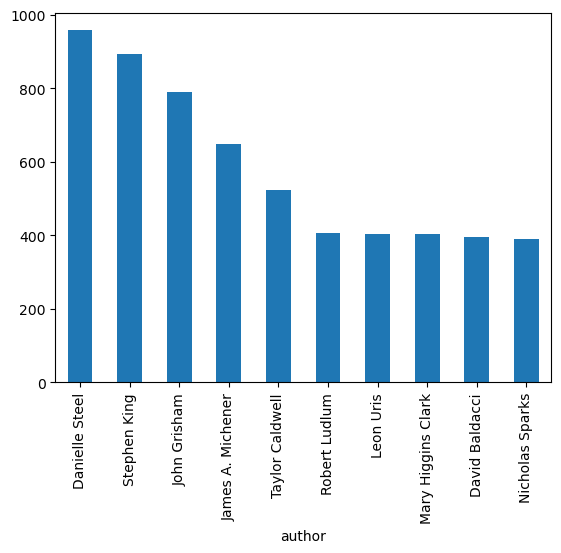

In [60]:
top_ten_authors = nyt_df['author'].value_counts()[:10]
print(top_ten_authors.plot(kind="bar"))

### Now, we're going to immediately get into the habit of **tucking our plots into variables**. 

### This is how we're asking you to make a plot in your homework, so take note!!

Here's how we're asking you to make and display plots in Pandas.

Axes(0.125,0.11;0.775x0.77)


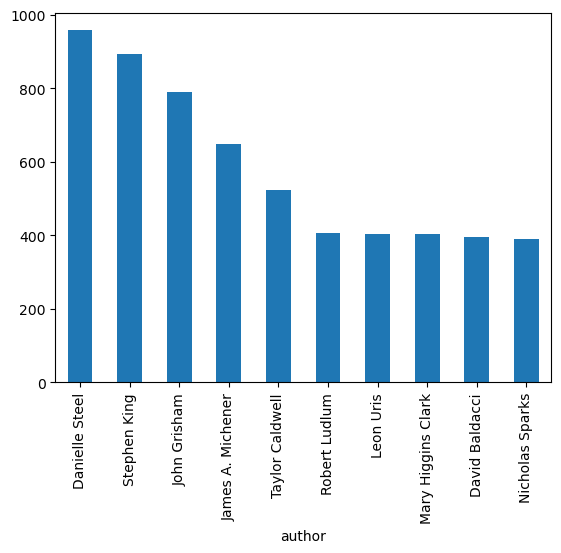

Okay, let's add a title to that plot, using the `title` parameter (and a `\n` "newline" character!)

Axes(0.125,0.11;0.775x0.77)


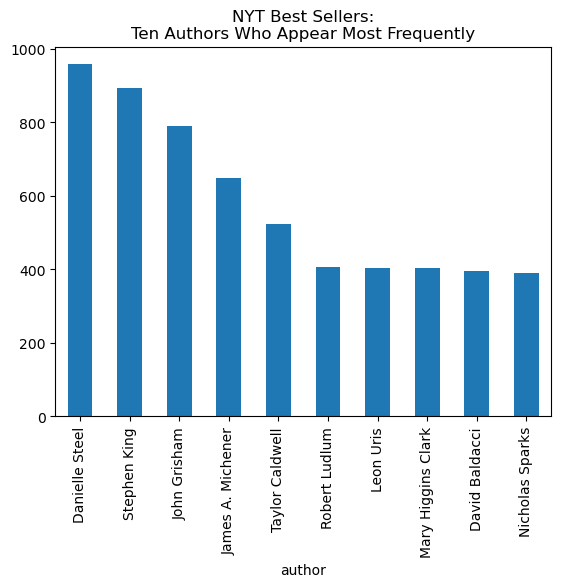

In [64]:
top_ten_authors = nyt_df['author'].value_counts()[:10]
plot = top_ten_authors.plot(kind="bar", title='NYT Best Sellers:\nTen Authors Who Appear Most Frequently')

print(plot)

And let's try making two different kinds of plots.

First, a `barh` or **horizontal bar**...

Axes(0.125,0.11;0.775x0.77)


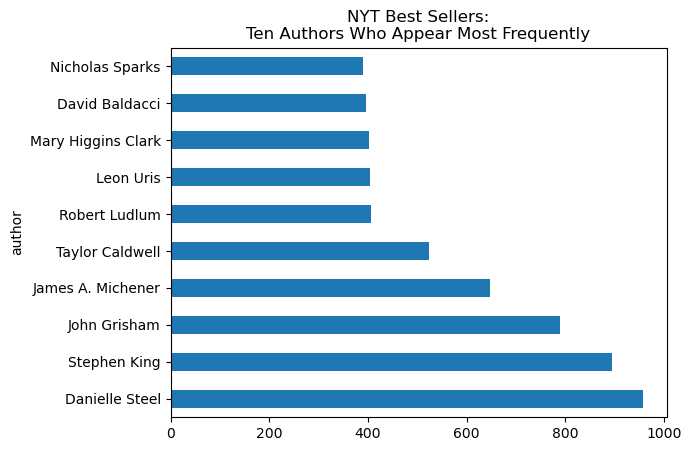

In [65]:
top_ten_authors = nyt_df['author'].value_counts()[:10]
plot = top_ten_authors.plot(kind="barh", title='NYT Best Sellers:\nTen Authors Who Appear Most Frequently')
print(plot)

Here is a `pie` plot — which could potentially be misconstrued in this context! **Why is this a potentially misleading plot?**

Axes(0.22375,0.11;0.5775x0.77)


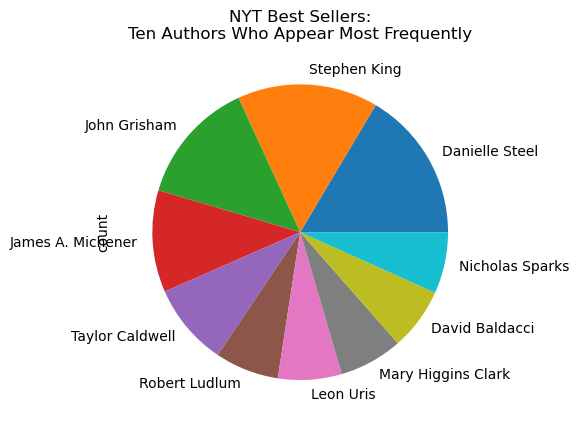

In [ ]:
top_ten_authors = nyt_df['author'].value_counts()[:10]
plot = top_ten_authors.plot(kind="pie", title='NYT Best Sellers:\nTen Authors Who Appear Most Frequently')
print(plot)

Now, if we wanted to **save** our pretty plot as a file, we could do so by applying the `.figure.savefig()` method to the variable containing our plot, and providing a filename as the argument.

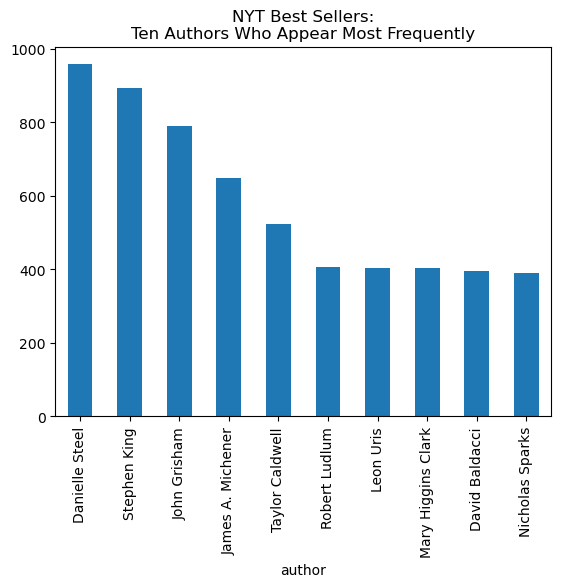

In [67]:
plot = nyt_df['author'].value_counts()[:10].plot(kind='bar', title='NYT Best Sellers:\nTen Authors Who Appear Most Frequently')
plot.figure.savefig('NYT-top10authors-barchart.png')

# Filtering Data

Let's say we wanted to produce a DataFrame object that ONLY included rows in which Toni Morrison is the author. We could do so with the following line of code:

In [68]:
nyt_df[nyt_df['author'] == 'Toni Morrison']

,year,week,rank,title_id,title,author
28893,1981,1981-04-19,7,4449,TAR BABY,Toni Morrison
28910,1981,1981-04-26,9,4449,TAR BABY,Toni Morrison
28928,1981,1981-05-03,12,4449,TAR BABY,Toni Morrison
28945,1981,1981-05-10,14,4449,TAR BABY,Toni Morrison
28957,1981,1981-05-17,11,4449,TAR BABY,Toni Morrison
...,...,...,...,...,...,...
56025,2015,2015-05-17,5,2004,GOD HELP THE CHILD,Toni Morrison
56044,2015,2015-05-24,9,2004,GOD HELP THE CHILD,Toni Morrison
56062,2015,2015-05-31,11,2004,GOD HELP THE CHILD,Toni Morrison
56080,2015,2015-06-07,14,2004,GOD HELP THE CHILD,Toni Morrison


The syntax of the above line is a bit tortured, with its square brackets within square brackets. From this point onward in the semester, we're going to get used to somewhat convoluted — but useful! — coding syntax, sometimes just accepting that it works and learning how to modify it to get what we want. For instance, without COMPLETELY understanding the above line of code, I bet you could figure out how to show me all the rows in which Virginia Woolf is the author!

But if you're curious to know what's actually going on, let's see what's inside this bit of code — i.e., the code that comes... `nyt_df[ RIGHT HERE ]` in the line of code above.

In [59]:
nyt_df['author'] == 'Rabindranath Tagore'

0        False
1        False
2        False
3        False
4        False
         ...  
60381    False
60382    False
60383    False
60384    False
60385    False
Name: author, Length: 60386, dtype: bool

In [69]:
type(nyt_df['author'] == 'Rabindranath Tagore')

pandas.core.series.Series

As you can see, this returns `Series` containng `True` or `False` for every row in the DataFrame: it is, in other words a `**bolean Series**`.

Let's put that **boolean Series** in its own variable.

In [70]:
morrison_filter = nyt_df['author'] == 'Toni Morrison'
type(morrison_filter)

pandas.core.series.Series

Pandas has built-in functionality whereby, if "subset" or "slice" a DataFrame with a **boolean Series** of the same length as that DataFrame, it will produce a new DataFrame that only contains the rows marked `True` in the boolean Series.

The below line of code is absolutely equivalent to `nyt_df[nyt_df['author'] == 'Toni Morrison']` encountered earlier — just a bit easier to read and understand!

In [71]:
nyt_df[morrison_filter]

,year,week,rank,title_id,title,author
28893,1981,1981-04-19,7,4449,TAR BABY,Toni Morrison
28910,1981,1981-04-26,9,4449,TAR BABY,Toni Morrison
28928,1981,1981-05-03,12,4449,TAR BABY,Toni Morrison
28945,1981,1981-05-10,14,4449,TAR BABY,Toni Morrison
28957,1981,1981-05-17,11,4449,TAR BABY,Toni Morrison
...,...,...,...,...,...,...
56025,2015,2015-05-17,5,2004,GOD HELP THE CHILD,Toni Morrison
56044,2015,2015-05-24,9,2004,GOD HELP THE CHILD,Toni Morrison
56062,2015,2015-05-31,11,2004,GOD HELP THE CHILD,Toni Morrison
56080,2015,2015-06-07,14,2004,GOD HELP THE CHILD,Toni Morrison


Let's capture that output -— that 115 row x 6 column DataFrame -- in a variable. The below lines of code do exactly the same thing.

In [72]:
morrison_nyt = nyt_df[nyt_df['author'] == 'Toni Morrison']
morrison_nyt = nyt_df[morrison_filter]

Let's have a look at that variable...

In [73]:
morrison_nyt

,year,week,rank,title_id,title,author
28893,1981,1981-04-19,7,4449,TAR BABY,Toni Morrison
28910,1981,1981-04-26,9,4449,TAR BABY,Toni Morrison
28928,1981,1981-05-03,12,4449,TAR BABY,Toni Morrison
28945,1981,1981-05-10,14,4449,TAR BABY,Toni Morrison
28957,1981,1981-05-17,11,4449,TAR BABY,Toni Morrison
...,...,...,...,...,...,...
56025,2015,2015-05-17,5,2004,GOD HELP THE CHILD,Toni Morrison
56044,2015,2015-05-24,9,2004,GOD HELP THE CHILD,Toni Morrison
56062,2015,2015-05-31,11,2004,GOD HELP THE CHILD,Toni Morrison
56080,2015,2015-06-07,14,2004,GOD HELP THE CHILD,Toni Morrison


Can you think of the line of code you would need to use to display all the rows in the dataset for novels titled "BELOVED"? (As you've noticed, book titles in this dataset are in ALL CAPS)

In [74]:
nyt_df[nyt_df['title'] == 'BELOVED']

,year,week,rank,title_id,title,author
13068,1956,1956-04-22,15,656,BELOVED,Viña Delmar
13083,1956,1956-04-29,14,656,BELOVED,Viña Delmar
13099,1956,1956-05-06,14,656,BELOVED,Viña Delmar
13117,1956,1956-05-13,16,656,BELOVED,Viña Delmar
13163,1956,1956-06-03,14,656,BELOVED,Viña Delmar
13181,1956,1956-06-10,16,656,BELOVED,Viña Delmar
33967,1987,1987-09-20,12,655,BELOVED,Toni Morrison
33978,1987,1987-09-27,7,655,BELOVED,Toni Morrison
33989,1987,1987-10-04,3,655,BELOVED,Toni Morrison
34006,1987,1987-10-11,5,655,BELOVED,Toni Morrison


How about a line of code that could create a new DataFrame that only contains titles that achieved the rank of #1 on the best seller list?

In [70]:
nyt_df[nyt_df['rank'] == 1]

,year,week,rank,title_id,title,author
0,1931,1931-10-12,1,6477,THE TEN COMMANDMENTS,Warwick Deeping
5,1931,1931-11-16,1,2878,MAID IN WAITING,John Galsworthy
10,1931,1931-11-30,1,2878,MAID IN WAITING,John Galsworthy
13,1931,1931-12-07,1,2878,MAID IN WAITING,John Galsworthy
16,1931,1931-12-14,1,2878,MAID IN WAITING,John Galsworthy
...,...,...,...,...,...,...
60311,2020,2020-11-08,1,259,A TIME FOR MERCY,John Grisham
60326,2020,2020-11-15,1,6252,THE SENTINEL,Lee Child and Andrew Child
60341,2020,2020-11-22,1,1902,FORTUNE AND GLORY,Janet Evanovich
60356,2020,2020-11-29,1,5631,THE LAW OF INNOCENCE,Michael Connelly
